<a href="https://colab.research.google.com/github/AbhinavRobinson/sendex_tut_dl/blob/master/Sendex_tuts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Lets import some libraries we need right now
# We have import some libraries afterwards too!
import tensorflow as tf
tf.__version__

# import mnist dataset
# 28x28 images of hand-written digits 0-9
mnist = tf.keras.datasets.mnist  

# Splitting data into train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalizing X data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

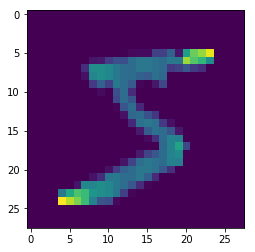

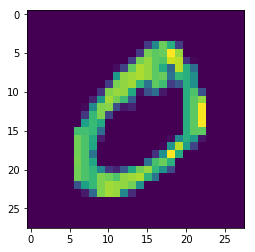

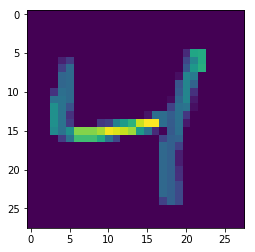

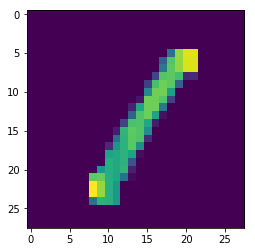

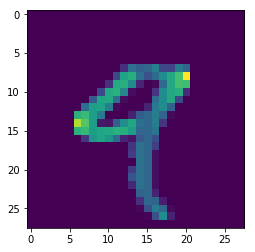

In [25]:
import matplotlib.pyplot as plt

""" 
Lets look at the data (first 5) 

>> We are plotting a tensor

NOTE:
Note that the image is actually a B/W image
but pyplot by default adds color as a function
of brightness, use "cmap = plt.cm.binary" to 
plot B/W images 
"""
for image in x_train[:5]:
  plt.imshow(image)
  plt.show()

In [26]:
# lets make our model, sequencial type
model = tf.keras.models.Sequential()

# lets make our tensor "flat"
model.add(tf.keras.layers.Flatten())

# lets make some hidden layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

# now we use softmax for probability distribution
model.add(tf.keras.layers.Dense(128, activation = tf.nn.softmax))

# lets train our model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# now we train
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3226 - acc: 0.9095
Epoch 2/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1222 - acc: 0.9622
Epoch 3/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0817 - acc: 0.9743


In [27]:
# Lets validate our model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)
# We get a loss of 10.38%
# and a accuracy of 96.8%

10000/10000 [==============================] - 0s 33us/sample - loss: 0.1009 - acc: 0.9703
0.10088845176016911 0.9703


In [0]:
model.save('epic_num_reader.model')

In [0]:
predictions = model.predict([x_test])

In [32]:
# we find that predictions is a One-hot-arrays of probabilities
print(predictions)

[[7.3115146e-11 7.3156968e-08 1.9217077e-06 ... 3.1257362e-14
  4.0028297e-14 7.2157585e-14]
 [3.2821237e-07 1.5579305e-03 9.9840337e-01 ... 2.2774272e-11
  6.6930636e-12 3.0132116e-12]
 [2.0755746e-07 9.9968421e-01 1.1953589e-04 ... 9.9078268e-10
  1.0250938e-09 3.6850731e-10]
 ...
 [4.1703448e-08 1.4483319e-07 3.1514858e-08 ... 4.7364478e-12
  1.4595235e-12 1.4145296e-12]
 [1.3964457e-06 6.4320454e-07 4.9409317e-07 ... 7.2412345e-12
  1.0225011e-11 7.8558791e-12]
 [3.3606073e-05 2.2897611e-06 1.4661265e-06 ... 7.6282132e-12
  1.4221619e-11 1.9568850e-11]]


In [33]:
import numpy as np
# we check the predictions for the first element 
print(np.argmax(predictions[0]))

7


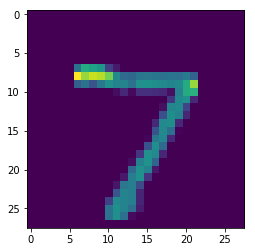

In [34]:
# but now lets see what was the actual "object" it just predicated
plt.imshow(x_test[0])
plt.show()

In [0]:
# Volla! it was a 7 :)